# Mitigating a Biased Dataset

*Disclaimer: All data points in this project are fictional and used solely for the purpose of this case study.*

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

A branch of the Ministry of Health, tasked with improving healthcare quality, is assessing the recent performance of a local hospital. To gather necessary data, the hospital selected a group of patients to whom they sent a survey, asking them to rate their satisfaction with the care they received on a scale of 1 to 10. The Ministry of Health will use the results from these surveys to decide if there is any concern regarding the current care standards. They believe an average rating of 5 or below suggests that an investigation into the hospital's practices may be necessary to discuss improvements that need to be made.

## The Data

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('hospital_satisfaction_ratings.csv')

# Display the DataFrame
df

,biological_sex,satisfaction_rating
0,Male,7.0
1,Male,9.0
2,Male,6.0
3,Male,9.0
4,Male,9.0
5,Male,7.0
6,Male,9.0
7,Male,9.0
8,Male,8.0
9,Male,10.0


### Choosing a statistic and examining raw

Mean is the best statistics to consider because the Ministry of Health need to made improvements if the average of healthcare quality rating 5 of below

In [ ]:
# Calculate statistic

statistic = df['satisfaction_rating'].mean()

# Display the average ratings 
statistic 

6.125429553264605

By looking mean satisfaction rating from raw data, the Ministry of Health may know that patients satisfied with the hospital service.

## Section 1: Exploratory Data Analysis

### 1. Create visualizations to view characteristics of raw data

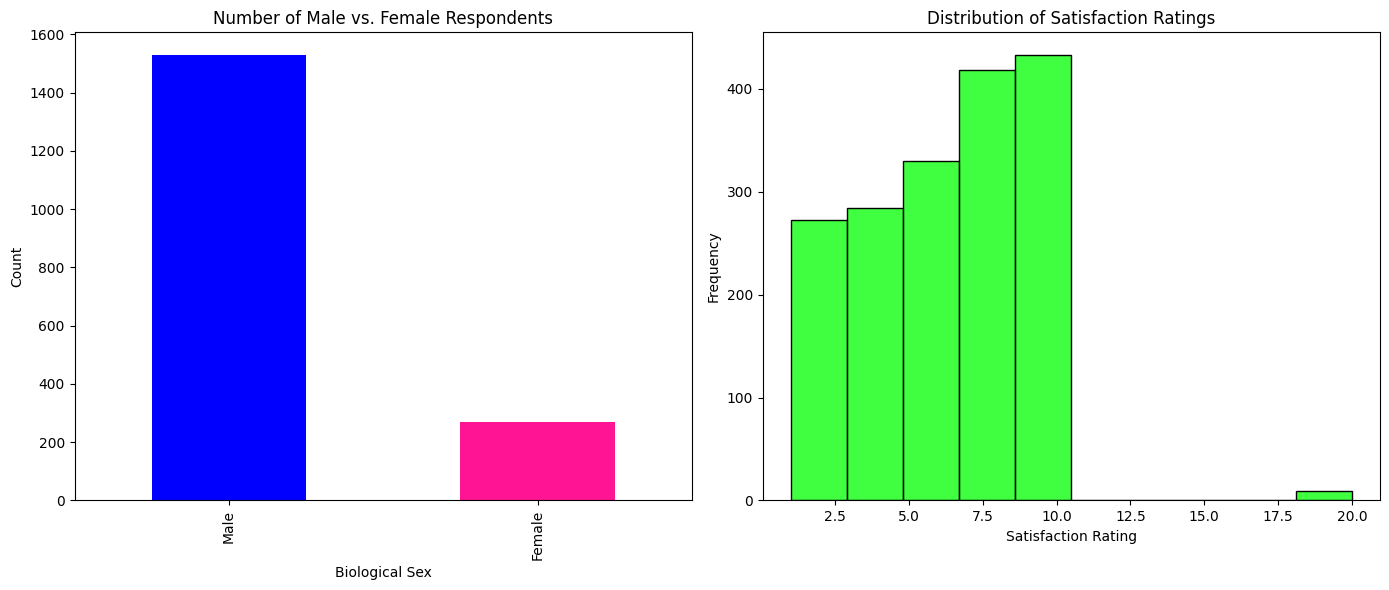

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the number of male and female respondents
sex_counts = df['biological_sex'].value_counts()
sex_counts.plot(kind='bar', color=['blue', 'deeppink'], ax=ax[0])
ax[0].set_xlabel('Biological Sex')
ax[0].set_ylabel('Count')
ax[0].set_title('Number of Male vs. Female Respondents')

sns.histplot(df['satisfaction_rating'], bins=10, kde=False, color='lime', ax=ax[1])
ax[1].set_xlabel('Satisfaction Rating')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of Satisfaction Ratings')

# Show the plot
plt.tight_layout()
plt.show()

The respondents gender is unbalance and there's odd data that give satisfaction rating above the actual rate (1-10)

### 2. Observe the bias

I noticed the following issues with the raw dataset:
* The respondents is gender unbalance
* There's outlier (satisfaction rating above 10)

## Section 2: Mitigate Bias with Data Cleaning

### 1. Examine missing values

In [ ]:
# First, calculate the percentage of values that are empty to see if it's worth removing
total_entries = len(df)
total_missing_values = df['satisfaction_rating'].isnull().sum()
percentage_missing = (total_missing_values / total_entries)*100

print('Total entries: ', total_entries)
print('Missing value percentage: %', percentage_missing)

Total entries:  1800
Missing value percentage: % 3.0


### 2. Handle missing values

In [ ]:
# Because the missing value percentage is below 5% which very small, so we can remove it

df_cleaned = df.dropna()

# Write a test to make sure that there are no missing values left
missing_values = (df_cleaned.isnull().sum().sum())

print('Missing values:  ', missing_values)

Missing values:   0


### 3. Examine outliers

In [ ]:
# Checking for Outliers
# Tip: Define a threshold based on what should not be possible 
outlier_threshold = 10

outliers = df_cleaned[df_cleaned['satisfaction_rating'] > outlier_threshold]

# Display outliers
print("Outliers:", outliers)

Outliers:      biological_sex  satisfaction_rating
486            Male                 20.0
507            Male                 20.0
577            Male                 20.0
893            Male                 20.0
1275           Male                 20.0
1289           Male                 20.0
1342           Male                 20.0
1495           Male                 20.0
1762         Female                 20.0


There's outliers because typo or the patients is super loyal (bias) and that's not important because Ministry of Health probably wants the objective opinion.

### 4. Handle outliers

In [ ]:
# Set new cleaned DataFrame to a table where no outliers exist 
df_cleaned = df_cleaned[(df_cleaned['satisfaction_rating'] >= 1) & (df_cleaned['satisfaction_rating'] <= 10)]
df_cleaned

,biological_sex,satisfaction_rating
0,Male,7.0
1,Male,9.0
2,Male,6.0
3,Male,9.0
4,Male,9.0
5,Male,7.0
6,Male,9.0
7,Male,9.0
8,Male,8.0
9,Male,10.0


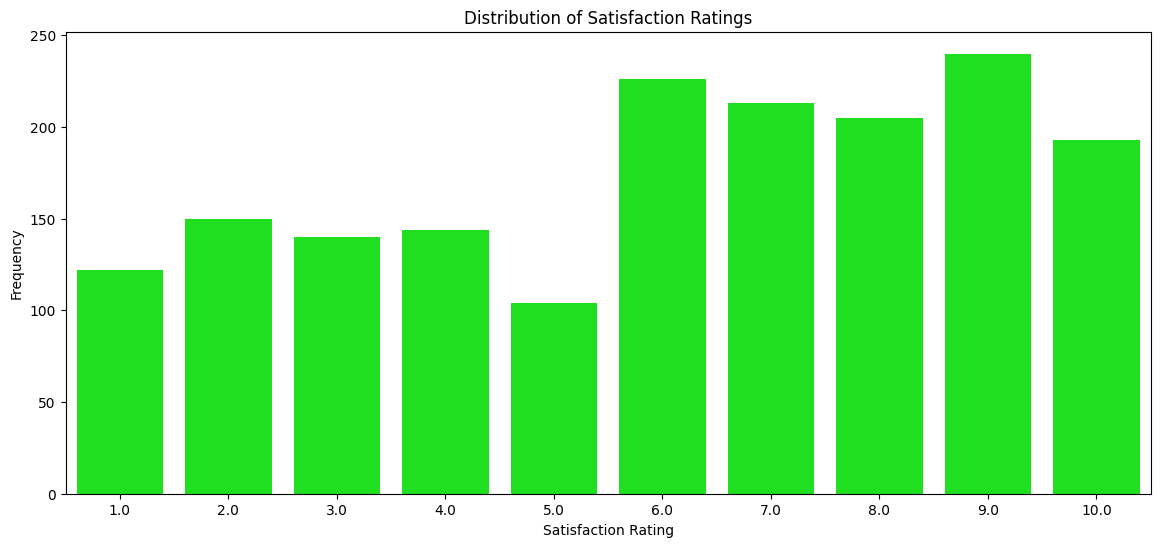

In [ ]:
# Create subplots
fig, ax = plt.subplots(figsize=(14, 6))

# Count the occurrences of each satisfaction rating
rating_counts = df_cleaned['satisfaction_rating'].value_counts().sort_index()

# Create a bar plot
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='lime')

# Set the labels and title
ax.set_xlabel('Satisfaction Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Satisfaction Ratings')

# Show the plot
plt.show()

## Section 3: Mitigate Bias with Stratified Sampling

Instructions:
* Split the dataset`df_cleaned` into female and male
* Find the length of female and male groups and analyze the minimum length of groups
* Choose sample size based on the minimum length of groups and randomly sample an equal number of male and female dummies
* Combine the two sample dataframes, into `balanced_df`


In [ ]:
#Step 1: Split the dataset into female and male data

male_dummies = df_cleaned[df_cleaned['biological_sex'] == 'Male']
female_dummies = df_cleaned[df_cleaned['biological_sex'] == 'Female']

In [ ]:
# Step 2: Find the minimum length of data
male_length = len(male_dummies)
female_length = len(female_dummies)
min_group_size = min(male_length, female_length)

print('Male length: ', male_length)
print('Female length: ', female_length)
print('Minimum length of data: ', min_group_size)

Male length:  1481
Female length:  256
Minimum length of data:  256


In [ ]:
# Step 3: Choose sample size 
sample_size = 250

male_sample = male_dummies.sample(sample_size)
female_sample = female_dummies.sample(sample_size)

print('Total male sample size: ', len(male_sample))
print('Total female sample size: ', len(female_sample))

Total male sample size:  250
Total female sample size:  250


In [ ]:
# Step 4: Combine both sampled DataFrames into one DataFrame

balanced_df = pd.concat([male_sample, female_sample])
balanced_df

,biological_sex,satisfaction_rating
1117,Male,1.0
983,Male,7.0
170,Male,7.0
793,Male,7.0
866,Male,8.0
1297,Male,5.0
1029,Male,10.0
1153,Male,3.0
735,Male,10.0
223,Male,9.0


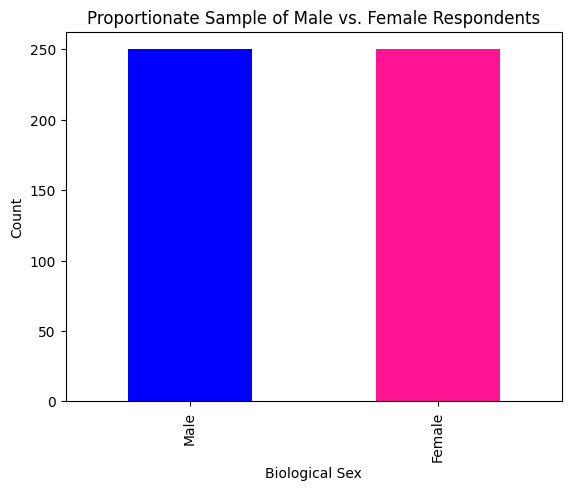

In [ ]:
# Visualizing the number of male and female respondents in the balanced dataset
balanced_gender_counts = balanced_df['biological_sex'].value_counts()
balanced_gender_counts.plot(kind='bar', color=['blue', 'deeppink']) # Feel free to change the colors
plt.xlabel('Biological Sex')
plt.ylabel('Count')
plt.title('Proportionate Sample of Male vs. Female Respondents')
plt.show()

## Section 4: Repeat steps from Section 1 for the newly balanced DataFrame

In [ ]:
# Calculate average ratings for each gender in the balanced dataset
# Hint: Remember, our balanced DataFrame is now called `balanced_df`.

balanced_average_ratings = balanced_df['satisfaction_rating'].mean()

# Display the new average ratings
balanced_average_ratings

4.638

Just curious, is the bad rating caused by female? (with assumption female more sensitive with service and critical when giving feedback. 

In [ ]:
avg_gender_ratings = balanced_df.groupby('biological_sex')['satisfaction_rating'].mean()
avg_gender_ratings

biological_sex
Female    2.780
Male      6.496
Name: satisfaction_rating, dtype: float64

With clean data, reduced bias, and new results, let's visualize the impact below. 

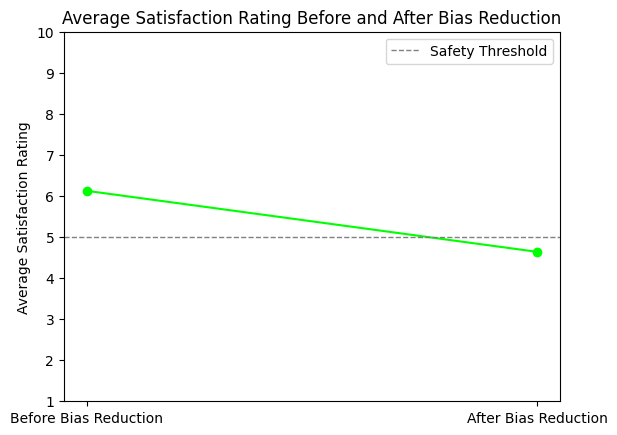

In [ ]:
# Plotting the points with adjusted x-coordinates
# Replace `statistic` and `balanced_average_ratings` here
plt.plot([0, 1], [statistic, balanced_average_ratings], marker='o', color='lime')

# Adding a horizontal dotted line at y=5 to signify the threshold
plt.axhline(y=5, color='gray', linestyle='--', linewidth=1, label='Safety Threshold')

# Customizing x-axis ticks and labels
plt.xticks([0, 1], ['Before Bias Reduction', 'After Bias Reduction'], fontsize='medium', horizontalalignment='center')

# Adding titles and labels
plt.title('Average Satisfaction Rating Before and After Bias Reduction')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 10)  # Setting y-axis limit from 1 to 10

plt.legend()

# Display the plot
plt.show()

After removing the missing values, eliminating outliers, and balancing the respondents gender to reduce bias, we discovered a different output (worse average level of patient satisfaction). Therefore, there must be a problem with the hospital care that needs to be analyzed in discussions with the Ministry of Health